%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from __future__ import print_function # adds compatibility to python 2
import xlrd
#
# !pip install xlrd
#

In [5]:
df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
#Exploring Data
df_can.columns.values
df_can.index.values
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [7]:
#Indexing and Selection
#Column
# df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]
# #row
#     df.loc[label]        
#         #filters by the labels of the index/column
#     df.iloc[index]       
#         #filters by the positions of the index/column
df_can.set_index('Country', inplace=True)
df_can.reset_index()
# optional: to remove the name of the index
# df_can.index.name = None

# To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.
df_can.columns = list(map(str, df_can.columns))

years = list(map(str, range(1980, 2014)))


In [8]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  2.1.1
[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


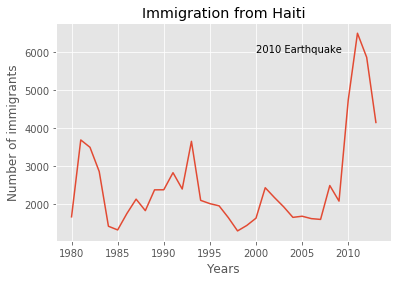

In [41]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake') # see note below


plt.show() # need this line to show the updates made to the figure

In [47]:
df_CI = df_can.loc[['China','India'], years]
df_CI = df_CI.transpose()

df_CI.plot(kind='line')
plt.show()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


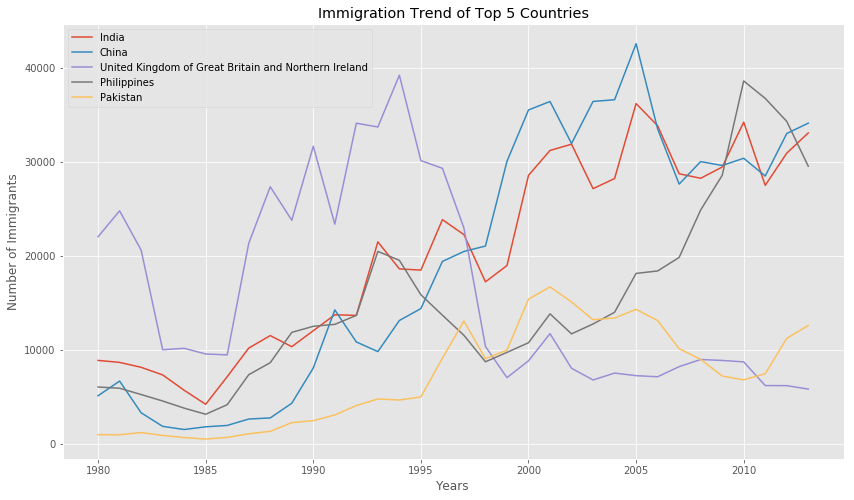

In [63]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose() 
df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

#Other plots
# bar for vertical bar plots
# barh for horizontal bar plots
# hist for histogram
# box for boxplot
# kde or density for density plots
# area for area plots
# pie for pie plots
# scatter for scatter plots
# hexbin for hexbin plot

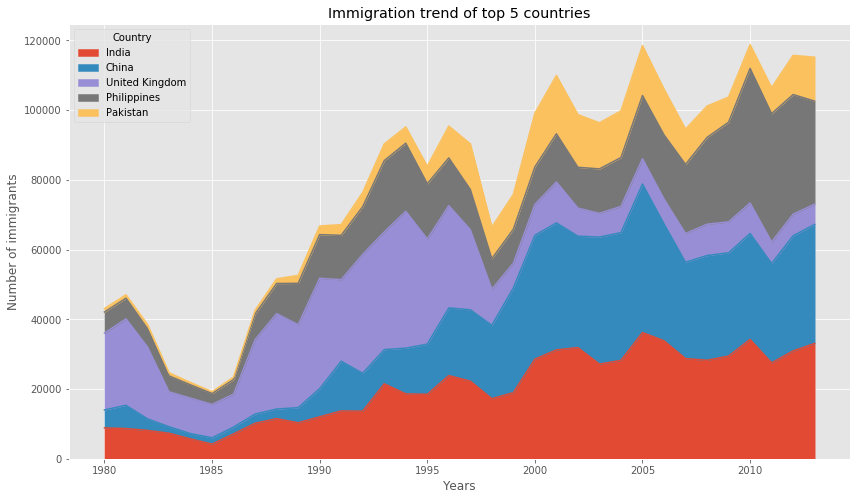

In [43]:
###########Area plot
df_canada = df_can.copy()

df_canada.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={ df_top5.columns[2]:'United Kingdom'}, inplace=True)
df_top5
df_top5.plot(kind='area', figsize=(14, 8))

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


plt.show()

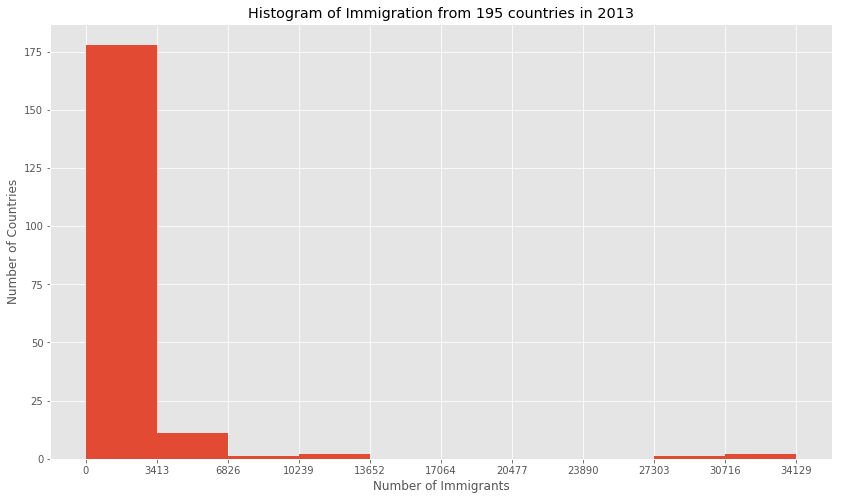

In [50]:
#########Histogram
count, bin_edges = np.histogram(df_canada['2013'])
df_canada['2013'].plot(kind='hist', xticks = bin_edges, figsize=(14, 8))

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

#can use numpy function to have the binn edges 




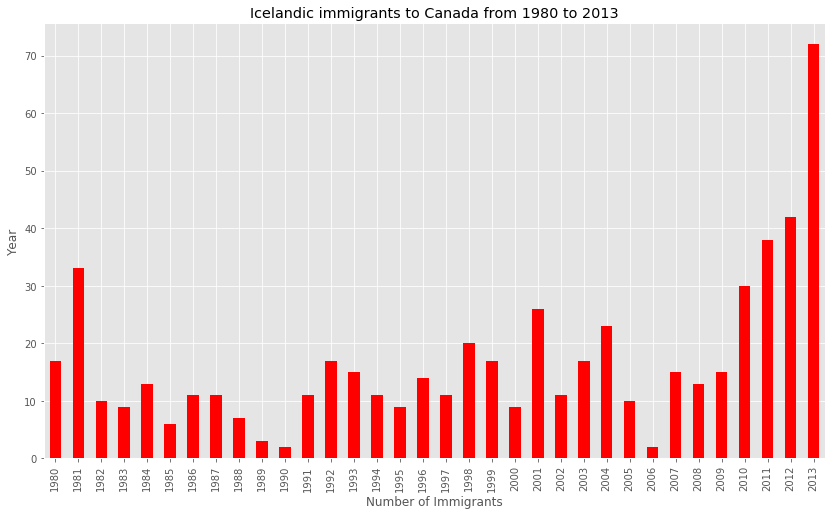

In [56]:
############Bar chart
df_iceland = df_canada.loc['Iceland',years]
df_iceland.plot(kind='bar', figsize=(14, 8), color= 'red')

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.ylabel('Year')
plt.xlabel('Number of Immigrants')
plt.show()


df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting


In [ ]:
Two types of plotting
As we discussed in the video lectures, there are two styles/options of ploting with matplotlib. Plotting using the Artist layer and plotting using the scripting layer.

*Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' *

You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
*Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *

You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

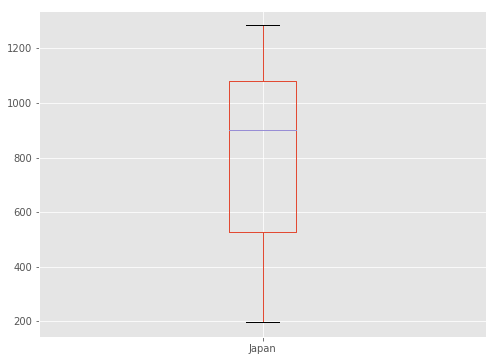

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [17]:
#Pie Chart
#Box Plot
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

df_japan.plot(kind='box', figsize=(8,6))
plt.show()

df_japan.describe()

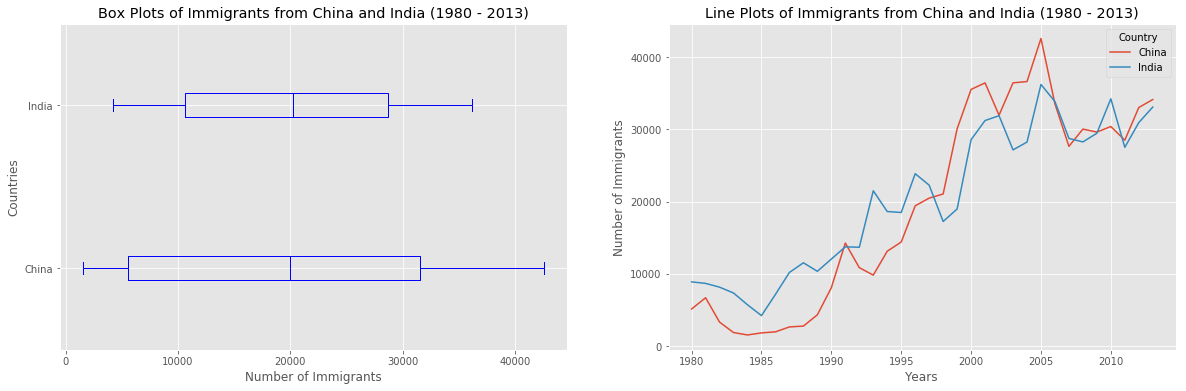

In [25]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
# df_CI.head()
# df_CI.plot(kind='box', figsize=(10, 7))

##To add more than one plot 
# fig = plt.figure() # create figure
# ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [5]:
######################Waffle Chart --> progess toward goals
######################Word Cloud
# install wordcloud
# !conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
###########Seaborn
# download file and save as alice_novel.txt
# !wget --quiet https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')


File downloaded and saved!


In [ ]:
# import seaborn as sns
# ax = sns.regplot(x='year', y='total', data = df_tot)